UNCOMMENTED QUICK AND DIRTY READOUT

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/home/eric/sim/WWLegend/Output/GerdaRuns/Gerda_nt_Score_t0.csv'
df = pd.read_csv(file_path, sep=',', header=12)


# Initialize empty NumPy arrays for each column
column_arrays = [np.empty(df.shape[0], dtype=object) for _ in range(8)]

# Its doing fine just ignorring the first row for some reason

# Iterate over each column and fill the NumPy arrays
for i, column in enumerate(df.columns):
    # Split each entry using ';' and convert to NumPy arrays
    column_arrays[i] = df[column].apply(lambda x: np.array(str(x).split(';'))).values

Water_energies = column_arrays[0]
Water_times = column_arrays[1]
LAr_energies = column_arrays[2]
LAr_times = column_arrays[3]
Ge_Amounts = column_arrays[4]
Ge_energies = column_arrays[5]
Ge_times = column_arrays[6]
Gd_times = column_arrays[7]
print(np.size(Gd_times))

29


In [39]:
firstWaterEnergies = Water_energies[1].astype(float)
firstWaterTimes = Water_times[1].astype(float)
firstLArEnergies = LAr_energies[1].astype(float)
firstLArTimes = LAr_times[1].astype(float)
firstGeEnergies = Ge_energies[1].astype(float)
firstGeTimes = Ge_times[1].astype(float)
firstGdTimes = Gd_times[1].astype(float)
def getEvent(num):
    global firstWaterEnergies, firstWaterTimes, firstLArEnergies, firstLArTimes, firstGeEnergies, firstGeTimes, firstGdTimes
    firstWaterEnergies = Water_energies[num].astype(float)
    firstWaterTimes = Water_times[num].astype(float)
    firstLArEnergies = LAr_energies[num].astype(float)
    firstLArTimes = LAr_times[num].astype(float)
    firstGeEnergies = Ge_energies[num].astype(float)
    firstGeTimes = Ge_times[num].astype(float)
    firstGdTimes = Gd_times[num].astype(float)



HISTOGRAM

ALL IN ONE

[32.0797 51.5675]


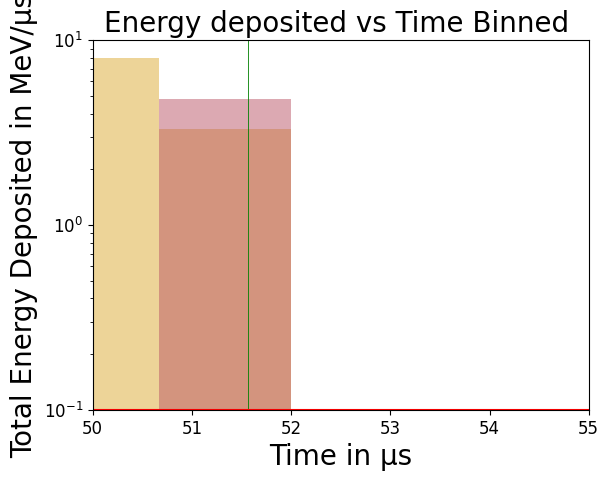

In [68]:
getEvent(7)
print(firstGdTimes)
def BinPlot(time_of_deposition, energy_deposited, color, label):
    n_time_bins = 150
    time_range = (0, 200)

    # Calculate the histogram of time bins
    hist, time_bin_edges = np.histogram(time_of_deposition, bins=n_time_bins, range=time_range)

    # Initialize an array to store total energy deposited in each time bin
    total_energy_per_time_bin = np.zeros(n_time_bins)

    # Loop through each time bin and sum the corresponding energy values
    for i in range(n_time_bins):
        mask = np.logical_and(time_of_deposition >= time_bin_edges[i], time_of_deposition < time_bin_edges[i + 1])
        total_energy_per_time_bin[i] = np.sum(energy_deposited[mask]) / (1e6)

    # Plot the results
    plt.bar(time_bin_edges[:-1], total_energy_per_time_bin, width=np.diff(time_bin_edges), align='edge', color=color, alpha = 0.5, label=label)   
    plt.yscale('log')
    # Add labels and title
BinPlot(firstWaterTimes, firstWaterEnergies, "#004488", "Water")
BinPlot(firstLArTimes, firstLArEnergies, "#DDAA33", "Argon")
BinPlot(firstGeTimes, firstGeEnergies, "#BB5566", "Germanium")
plt.vlines(firstGdTimes, ymin=0, ymax=1e3, colors="green", linewidth=0.6, label="Gd capture")
plt.hlines(y=1e-1,xmin=0,xmax=150, colors="red", label="100 keV cut")
plt.xlabel('Time in µs')
plt.ylabel('Total Energy Deposited in MeV/µs')
plt.title('Energy deposited vs Time Binned ')
plt.ylim(ymin = 1e-1, ymax = 1e1)#
plt.xlim(xmin=50, xmax=55)
#plt.savefig("/home/eric/sim/WWLegend/Plots/Gerda/PartyEvent.png")
plt.show()
#Event 12 looks very good
#Event 16 + 19 + 21 to investigate cut
#Event 27 party

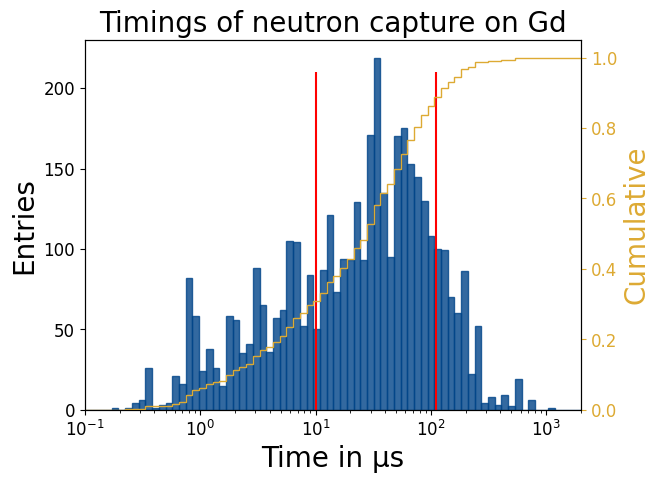

NCaptures in Intervall: 2261
NCaptures outside Intervall: 1690
512


In [29]:
All_Gd_Times = np.array([])
for sub in Gd_times:
    sub = sub.astype(float)
    for i in sub:
        All_Gd_Times = np.append(All_Gd_Times, i)

plt.rc('font', size=12)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)

fig, ax = plt.subplots()

n_bins = 80

ax.hist(All_Gd_Times, bins=np.logspace(np.log10(1e-1),np.log10(4e3),n_bins), color="#004488", alpha = 0.8, histtype='bar',edgecolor='#004488')

ax2 = ax.twinx()
ax2.hist(All_Gd_Times, bins=np.logspace(np.log10(1e-1),np.log10(4e3),n_bins), color="#DDAA33", density=True, histtype='step',cumulative=True)

ax2.set_ylabel('Cumulative', color="#DDAA33")
ax2.tick_params(axis='y', colors="#DDAA33")
ax.set_xlabel('Time in µs')
ax.set_xlim(xmin=1e-1, xmax=2e3)
ax.set_ylabel('Entries')
ax.set_title('Timings of neutron capture on Gd')
ax.vlines([10,110], ymin=0,ymax=210, colors="red")
ax.set_xscale("log")
plt.savefig("/home/eric/sim/WWLegend/Plots/Gerda/TimeGd.png",dpi=300, bbox_inches="tight", pad_inches=0.1)
plt.show()

sum = np.sum((All_Gd_Times > 10) & (All_Gd_Times <110))
print(f"NCaptures in Intervall: {sum}")
temp = (np.size(All_Gd_Times) - sum)
print(f"NCaptures outside Intervall: {temp}")
sum = np.sum(All_Gd_Times > 110)
print(sum)

FIND GOOD EVENTS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


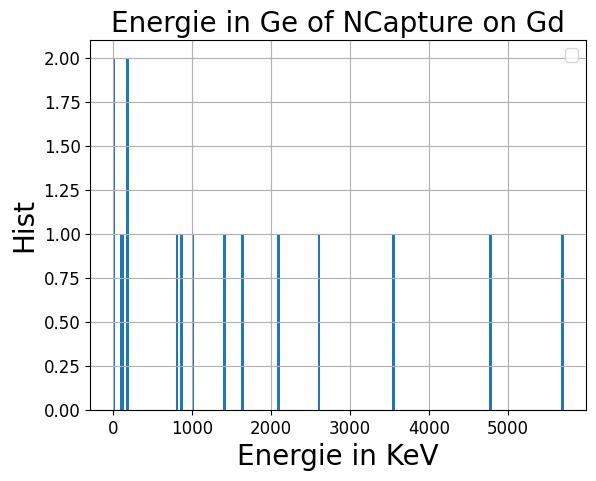

[ 107.2407   120.152   4772.8192   813.1736  5707.9     1024.1035
   19.2325  2108.367    877.0371  3542.11723  193.6005   189.1935
 2620.999   1426.5017     0.      1653.0319 ]
13
14


In [71]:
temp = 0
EnergieArray = np.array([])
nGood = 0
for sub in Gd_times:
    binsize = 0.5
    GeEnergies = Ge_energies[temp].astype(float)
    GeTimes = Ge_times[temp].astype(float)
    temp = temp + 1
    sub = sub.astype(float)
    isGood = False
    for i in sub:
        if i > 10 and i < 110:
            upper= i + binsize
            energievariable = 0
            energie = 0
            for number in GeTimes:
                if i < number < upper:
                    isGood = True
                    energie = energie + GeEnergies[energievariable] / (1e3)
                energievariable = energievariable + 1
            if isGood:
                EnergieArray =  np.append(EnergieArray,energie)
    if isGood:
        nGood = nGood + 1

fig, ax = plt.subplots()

n_bins = 200

ax.hist(EnergieArray, bins=n_bins)


ax.set_xlabel('Energie in KeV')
ax.set_ylabel('Hist')
ax.set_title('Energie in Ge of NCapture on Gd')
ax.legend(loc= "upper right")
ax.grid()

#plt.savefig("/home/eric/sim/WWLegend/Plots/EnergiesGe.png")
plt.show()
print(EnergieArray)
print(nGood)        
print(np.sum(EnergieArray > 100))

TRY COOL 2d PLOT

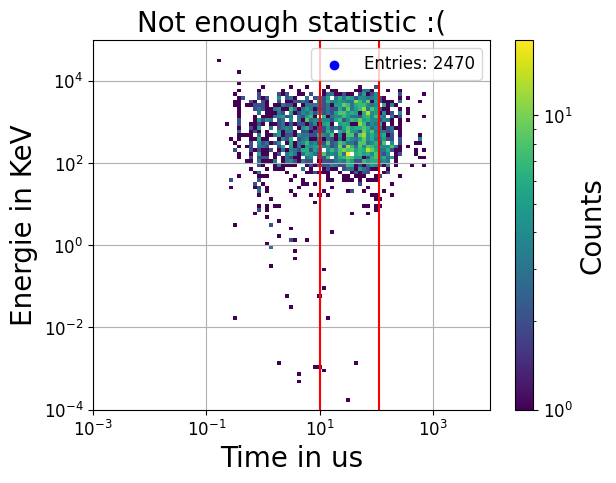

In [12]:
GoodGdArray = np.array([])
GooodEnergyArray = np.array([])
temp = 0
for sub in Gd_times:
    binsize = 1
    GeEnergies = Ge_energies[temp].astype(float)
    GeTimes = Ge_times[temp].astype(float)
    temp = temp + 1
    sub = sub.astype(float)
    for i in sub:
        upper= i + binsize
        energievariable = 0
        energie = 0
        for number in GeTimes:
            if i < number < upper:
                energie = energie + GeEnergies[energievariable] / (1e3)
            energievariable = energievariable + 1
        if energie > 0:
            GooodEnergyArray =  np.append(GooodEnergyArray,energie)
            GoodGdArray =  np.append(GoodGdArray,i)


n_bins = 100
ses = np.size(GoodGdArray)
plt.hist2d(GoodGdArray, GooodEnergyArray, bins=(np.logspace(np.log10(1e-3),np.log10(1e4),n_bins),np.logspace(np.log10(1e-4),np.log10(1e5),n_bins)), norm="log")
plt.colorbar(label='Counts')
dummy_plot = plt.scatter([], [], label=f'Entries: {ses}', color='blue')

plt.xlabel('Time in us')
plt.ylabel('Energie in KeV')
plt.title('Not enough statistic :(')
plt.legend(loc= "upper right")
plt.xscale("log")
plt.yscale("log")
plt.vlines([10,110], ymin=1e-4,ymax=1e5, colors="red")
plt.grid()

#plt.savefig("/home/eric/sim/WWLegend/Plots/Gerda/Map.png")
plt.show()

Try the energy plot but filter for detectors!:

In [37]:
def split_by_detector(energies, detector_counts):
    split_arrays = []
    start_index = 0
    for count in detector_counts:
        split_arrays.append(energies[start_index:start_index+count])
        start_index += count
    return split_arrays


def sort_the_data(All_entries, All_energies):
    temp = 0
    Sorted_energie_array = np.empty(48, dtype=object)
    for i in range(48):
        Sorted_energie_array[i] = np.array([])

    for entries in All_entries:
        energies = All_energies[temp].astype(float)
        try:
            entries = entries.astype(int)
            single_event = split_by_detector(energies, entries)
            temp = temp + 1
            for i in range(len(single_event)):
                Sorted_energie_array[i] = np.append(Sorted_energie_array[i], single_event[i])
        except ValueError:
            temp = temp + 1
    return Sorted_energie_array

19178


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


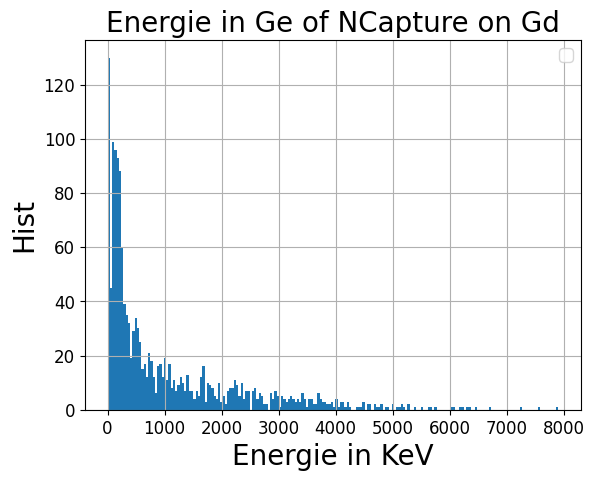

[ 805.81434  184.122   2143.5406  ... 1913.2712   238.1846   236.489  ]
1223
1292


In [13]:

temp = 0
EnergieArray = np.array([])
nGood = 0
for sub in Gd_times:
    binsize = 0.5
    GeEnergies = Ge_energies[temp].astype(float)
    GeTimes = Ge_times[temp].astype(float)
    temp = temp + 1
    sub = sub.astype(float)
    isGood = False
    for i in sub:
        if i > 10 and i < 110:
            upper= i + binsize
            energievariable = 0
            energie = 0
            for number in GeTimes:
                if i < number < upper:
                    isGood = True
                    energie = energie + GeEnergies[energievariable] / (1e3)
                energievariable = energievariable + 1
            if isGood:
                EnergieArray =  np.append(EnergieArray,energie)
    if isGood:
        nGood = nGood + 1

fig, ax = plt.subplots()

n_bins = 200

ax.hist(EnergieArray, bins=n_bins)


ax.set_xlabel('Energie in KeV')
ax.set_ylabel('Hist')
ax.set_title('Energie in Ge of NCapture on Gd')
ax.legend(loc= "upper right")
ax.grid()

#plt.savefig("/home/eric/sim/WWLegend/Plots/EnergiesGe.png")
plt.show()
print(EnergieArray)
print(nGood)        
print(np.sum(EnergieArray > 100))